#  Import

In [1241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [1242]:
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [1243]:
medical = pd.read_csv('insurance.csv')

In [1244]:
medical.shape

(1338, 7)

In [1245]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1246]:
medical.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [1247]:
medical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [1248]:
medical.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [1249]:
medical.duplicated().sum()

np.int64(1)

In [1250]:
medical = medical.drop_duplicates().reset_index(drop=True)

# Data Preprocessing

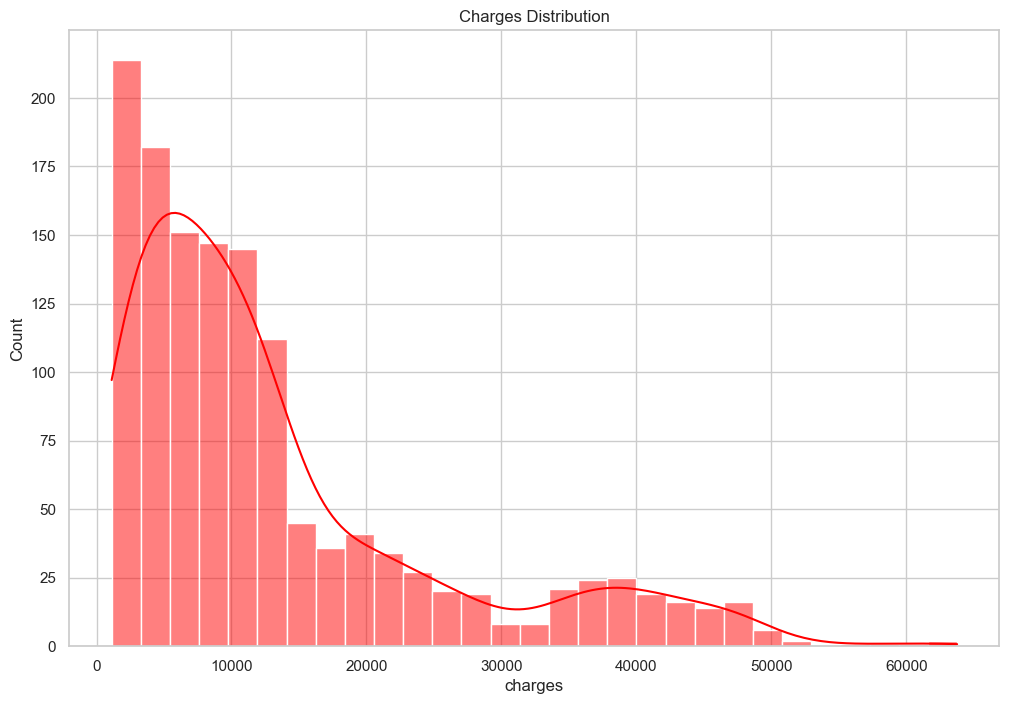

In [1251]:
sns.set(style='whitegrid')
f, axes = plt.subplots(1,1, figsize=(12, 8))
axes = sns.histplot(medical['charges'], kde = True, color='red')
plt.title('Charges Distribution')
plt.show()

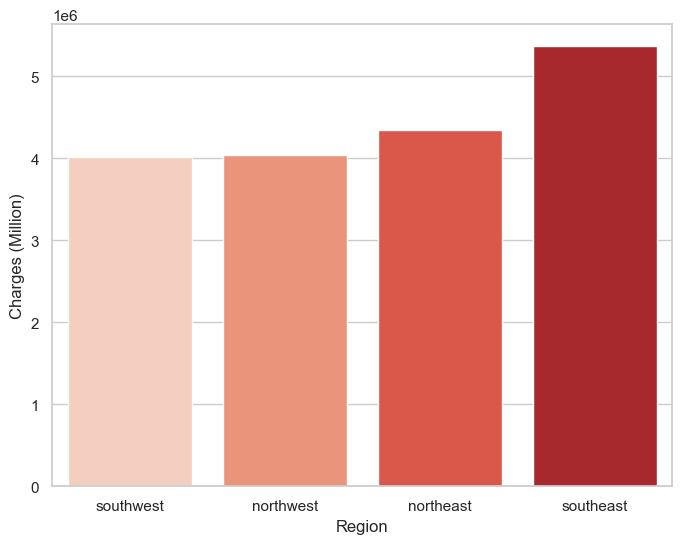

In [1252]:
charges = medical['charges'].groupby(medical.region).sum().sort_values(ascending = True)
f, axes = plt.subplots(1, 1, figsize=(8, 6))
plt.xlabel('Region')
plt.ylabel('Charges (Million)')
sns.barplot(charges.head(), palette='Reds')
plt.show()

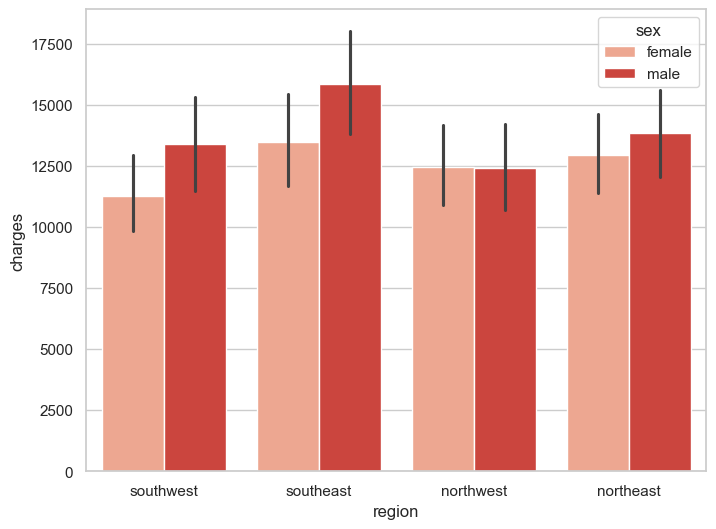

In [1253]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
axes = sns.barplot(data=medical, x='region', y='charges', hue='sex', palette='Reds')

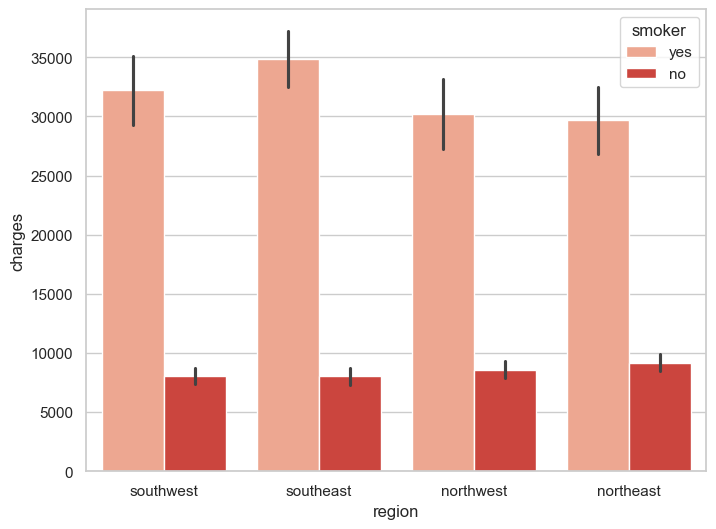

In [1254]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
axes = sns.barplot(data=medical, x='region', y='charges', hue='smoker', palette='Reds')

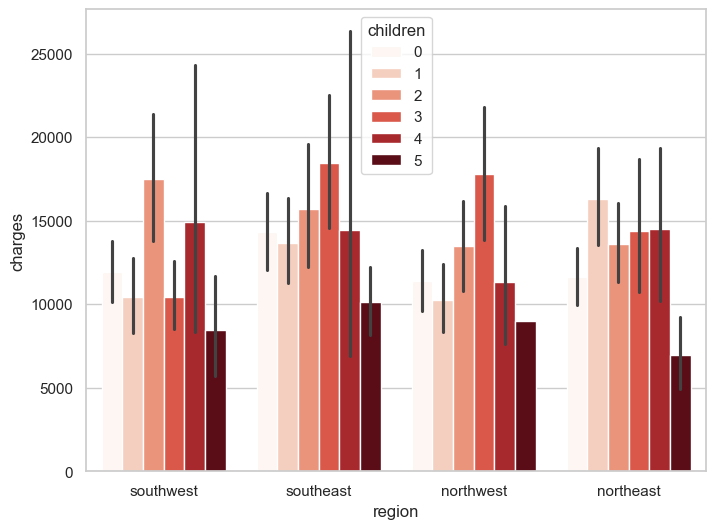

In [1255]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
axes = sns.barplot(data=medical, x='region', y='charges', hue='children', palette='Reds')

### Check Outliers

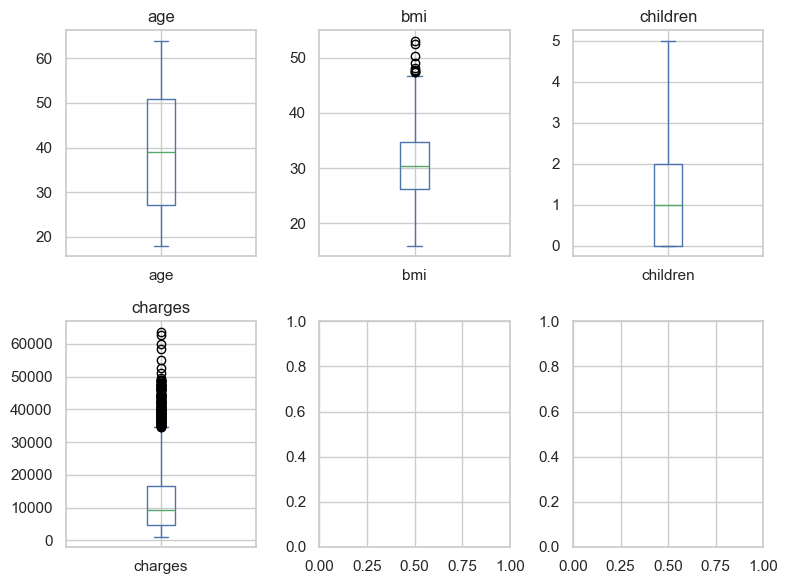

In [1256]:
ratio_data = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for i, data in enumerate(ratio_data):
    row = i // 3
    col = i % 3

    medical[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

plt.tight_layout()
plt.show()


In [1257]:
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(medical[nama_kolom], 25, interpolation = 'midpoint')

  Q3 = np.percentile(medical[nama_kolom], 75, interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(medical[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
      bound = np.where(medical[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [1258]:
# Jumlah outliers kolom age
upper_age = cek_outlier('age','upper_bound')
lower_age = cek_outlier('age','lower_bound')
print(f"Jumlah total outlier kolom age : {len(upper_age) + len(lower_age)}")
#Jumlah outliers kolom bmi
upper_bmi = cek_outlier('bmi','upper_bound')
lower_bmi = cek_outlier('bmi','lower_bound')
print(f"Jumlah total outlier kolom bmi : {len(upper_bmi) + len(lower_bmi)}")
# Jumlah outliers kolom children
upper_children = cek_outlier('children','upper_bound')
lower_children = cek_outlier('children','lower_bound')
print(f"Jumlah total outlier kolom children : {len(upper_children) + len(lower_children)}")
# Jumlah outliers kolom charges
upper_charges = cek_outlier('charges','upper_bound')
lower_charges = cek_outlier('charges','lower_bound')
print(f"Jumlah total outlier kolom charges : {len(upper_charges) + len(lower_charges)}")

Jumlah total outlier kolom age : 0
Jumlah total outlier kolom bmi : 9
Jumlah total outlier kolom children : 18
Jumlah total outlier kolom charges : 139


### Label Encoding

In [1259]:
medical.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [1260]:
cat_columns = ['sex', 'smoker', 'region']
for col in cat_columns:
    medical[col] = medical[col].astype('category').cat.codes

medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Linear Regression

In [1261]:
x = medical.drop(['charges'], axis=1)
y = medical['charges']

In [1262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [1263]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [1264]:
y_pred = model.predict(x_test)

In [1265]:
medical = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})
medical.head(10)

,Actual,Prediction
899,8688.85885,8080.450186
1063,5708.86700,5592.871120
1255,11436.73815,14378.298655
298,38746.35510,31731.819541
237,4463.20510,9158.356944
481,9304.70190,13361.014269
240,38511.62830,30257.655258
277,2150.46900,1308.647356
415,7345.72660,10849.425445
706,10264.44210,11375.548519


In [1266]:
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Accuracy score: {model.score(x_test, y_test)}')

Koefisien: [  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173  -237.62514748]
Intercept: -11047.686556720208
Accuracy score: 0.8068466322629111


In [1267]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Absolute Error: 4182.353155288297
Mean Absolute Percentage Error: 0.41792730091179425
Mean Squared Error: 35493102.61165053
